# Investigation of ecoli outbreak in April 2011, de novo genome assembly

## 1. Exploring dataset

In [ ]:
!fastqc -o . SRR292862_1.fastq SRR292862_2.fastq SRR292770_1.fastq SRR292770_2.fastq SRR292678sub_S1_L001_R1_001.fastq SRR292678sub_S1_L001_R2_001.fastq 

<img src="images/fastqc_quality.png">

In [31]:
!head -20 SRR292678sub_S1_L001_R1_001.fastq

@SRX079804:1:SRR292678:1:1101:1:1 1:N:0:1
ATGTTGCCGGAATATGCTTATGGCATCGACACGTTCTTACTATGTGTCGATGAAATTCGCTTTTTTAAACATGTCTTCTGGATATGTTTA
+
HHHHHHFHFGHHHHHHHHHFHFHHHGFHEHGHEFHHHHHHHHHHHHHHHHFHHHHHHHHHFHHHEHDGFHDFFEGGGGFGHBHHHE>EEE
@SRX079804:1:SRR292678:1:1101:3:3 1:N:0:1
AACAACGCTACCGACATCATCGTAAATTGCTGAAGCTATGCAATTCAGACCTACAACATGCTCTTCTTTATCTACGGTATAGCCCAGTTC
+
GGGGGGGGGGGGGGGGGGGEGGCGEGGGGGGGFGGGFBG>GGGGGGGGGGGEFGDGGGEFFDGBGGFG?GEGFEGEGEGEEDE?EEECDE
@SRX079804:1:SRR292678:1:1101:4:4 1:N:0:1
AGGATGGTTATTTTAAACCCGAGCAGCGTCAGGCGCTGTTTGAACGCATTCATGCCAGCGGAGCGCAAATCGTCACCGTTGCGATGGGAT
+
HHHHHHHHHHEFHFHHHHHHHBGGGHDHFHFHH@FHFHEGHHEDFH?EGHFFEHBG=GFFF=FBFFFHFFHFEHEFFFFF@EEEEHGHBF
@SRX079804:1:SRR292678:1:1101:5:5 1:N:0:1
TCAGCTTTTTGCCGACTACAAACTGCTACCACCGTTCCGCCAGCTCGACCGTAACAGCTACGCCCTGACAGAAGCCGAGCGCAATGCCAG
+
HGHGCHHHEHEEFHHGHHHHGGHFHHHHBHGGGGEHFGFFFFH;EBEFFFHFFH5FEABEGAFBF2@:>A?CCADGEFF>EEECA:8B?@
@SRX079804:1:SRR292678:1:1101:6:6 1:N:0:1
CGCCGACGCTGGTTGAAGAGCAAACCGTGCTGCAAAAGGTCACCGAAGTCAGCC

## 2. k-mer profile and genome size estimation

In [4]:
!jellyfish count -m 31 -s 5M -C -o mer_31.jf SRR292678sub_S1_L001_R1_001.fastq

In [5]:
!jellyfish histo mer_31.jf > mer_31_depth_histo.csv

In [7]:
!head -20 mer_31_depth_histo.csv

1 6755622
2 266510
3 48557
4 18950
5 11926
6 9246
7 8919
8 9025
9 9349
10 10418
11 11379
12 12046
13 12854
14 14664
15 15701
16 16998
17 18624
18 19700
19 20947
20 22880


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv('mer_31_depth_histo.csv', header=None, sep=' ', names=['depth', 'num'], index_col=0)

In [38]:
print(df.head())

           num
depth         
1      6755622
2       266510
3        48557
4        18950
5        11926


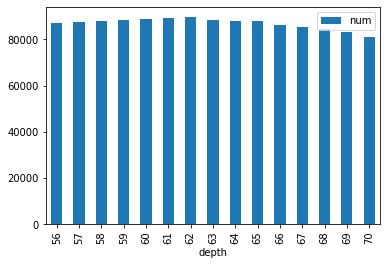

In [48]:
df[55:70].plot.bar()

In [50]:
L = 90
M = 64
K = 31
T = 5499346 * 90
N = (M * L) / (L - K + 1)
genome_size = T / N
# (N: Depth of coverage, M: Kmer peak, K: Kmer-size, L: avg read length T: Total bases)



In [51]:
print(int(genome_size))

5155636


In [20]:
!gunzip spades_results/corrected/SRR292678sub_S1_L001_R1_001.00.0_0.cor.fastq.gz

In [44]:
!jellyfish count -m 31 -s 6M -C -o cor_mer_31.jf spades_results/corrected/SRR292678sub_S1_L001_R1_001.00.0_0.cor.fastq

In [45]:
!jellyfish histo cor_mer_31.jf > cor_mer_31_depth_histo.csv

In [46]:
df2 = pd.read_csv('cor_mer_31_depth_histo.csv', header=None, sep=' ', names=['depth', 'num'], index_col=0)

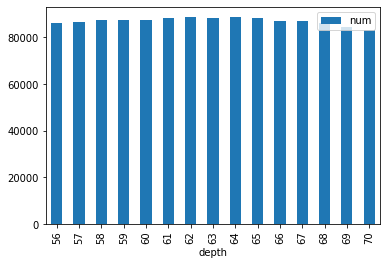

In [49]:
df2[45:70].plot.bar()


## 3. Genome assembly using SPAdes

SPAdes results were muted due to being massive, but run as follows:

In [ ]:
!spades.py --test

In [ ]:
!spades.py -1 SRR292678sub_S1_L001_R1_001.fastq -2 SRR292678sub_S1_L001_R2_001.fastq -o spades_results

In [ ]:
!spades.py --pe1-1 SRR292678sub_S1_L001_R1_001.fastq --pe1-2 SRR292678sub_S1_L001_R2_001.fastq --mp1-1 SRR292862_1.fastq --mp1-2 SRR292862_2.fastq --mp2-1 SRR292770_1.fastq --mp2-2 SRR292770_2.fastq -o spades_results_all_libs

## 4. Quast analysis

<img src="images/quast_results1.png">
<img src="images/quast_results2.png">

## 5. Genome annotation

In [59]:
!prokka three_libs_spades_out/contigs.fasta --centre 15 --compliant --outdir prokka_results --quiet

## 6. Finding the closest relative of E. coli X

In [62]:
!barrnap three_libs_spades_out/scaffolds.fasta --outseq rna_matches --quiet

##gff-version 3
NODE_184_length_223_cov_0.720238_ID_565088	barrnap:0.9	rRNA	95	205	5.6e-18	-	.	Name=5S_rRNA;product=5S ribosomal RNA
NODE_1_length_2815616_cov_74.3819_ID_564387	barrnap:0.9	rRNA	322892	323002	2.2e-11	-	.	Name=5S_rRNA;product=5S ribosomal RNA
NODE_1_length_2815616_cov_74.3819_ID_564387	barrnap:0.9	rRNA	323101	326001	0	-	.	Name=23S_rRNA;product=23S ribosomal RNA
NODE_1_length_2815616_cov_74.3819_ID_564387	barrnap:0.9	rRNA	326359	327896	0	-	.	Name=16S_rRNA;product=16S ribosomal RNA
NODE_1_length_2815616_cov_74.3819_ID_564387	barrnap:0.9	rRNA	592162	592272	6.1e-11	-	.	Name=5S_rRNA;product=5S ribosomal RNA
NODE_1_length_2815616_cov_74.3819_ID_564387	barrnap:0.9	rRNA	592407	592517	2.2e-11	-	.	Name=5S_rRNA;product=5S ribosomal RNA
NODE_1_length_2815616_cov_74.3819_ID_564387	barrnap:0.9	rRNA	592616	595516	0	-	.	Name=23S_rRNA;product=23S ribosomal RNA
NODE_1_length_2815616_cov_74.3819_ID_564387	barrnap:0.9	rRNA	595966	597503	0	-	.	Name=16S_rRNA;product=16S ribosomal RNA
NODE_1_l

In [65]:
!head -3 rna_matches

>16S_rRNA::NODE_1_length_2815616_cov_74.3819_ID_564387:326358-327896(-)
TTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAACGGTAACAGGAAACAGCTTGCTGTTTCGCTGACGAGTGGCGGACGGGTGAGTAATGTCTGGGAAACTGCCTGATGGAGGGGGATAACTACTGGAAACGGTAGCTAATACCGCATAACGTCGCAAGACCAAAGAGGGGGACCTTCGGGCCTCTTGCCATCGGATGTGCCCAGATGGGATTAGCTTGTTGGTGGGGTAACGGCTCACCAAGGCGACGATCCCTAGCTGGTCTGAGAGGATGACCAGCCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTGTATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGGAGTAAAGTTAATACCTTTGCTCATTGACGTTACCCGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCGACTTGGAGGTTGTGCCCTTGAGGCGTGGCTTCCGGAGCTAACGCGTTAAGTCGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCC

Now BLAST the sequences to find the closest relative.

## BLAST results: https://www.ncbi.nlm.nih.gov/nucleotide/NC_011748.1?report=genbank&log$=nuclalign&blast_rank=1&RID=ZR8YX4H8014

## 7. What is the genetic cause of HUS?


Using mauve alignment of assembled genome to E. coli 55989 we can search for genes of interest.

Genes responsible for shiga toxin:

stxA (484520-485479)

stxB (484239-484508)



<img src="images/mauve_align.png">

## 8. Tracing the source of toxin genes in E. coli X

Lets look at the result of search for antibiotic resistance genes in ResSeq:

In [72]:
res_df = pd.read_csv('resfinder_ecoli_55989.tsv', sep='\t')
print('RESISTANCE E. COLI 55989')
print(res_df[['Database', 'Resistance gene']])

RESISTANCE E. COLI 55989
       Database Resistance gene
0     macrolide          mdf(A)
1  tetracycline          tet(B)


In [74]:
res_x_df = pd.read_csv('resfinder_ecoli_x.tsv', sep='\t')
print('RESISTANCE E. COLI X')
print(res_x_df[['Database', 'Resistance gene']])

RESISTANCE E. COLI X
          Database Resistance gene
0     trimethoprim           dfrA7
1     tetracycline          tet(A)
2      beta-lactam     blaCTX-M-15
3      beta-lactam       blaTEM-1B
4        macrolide          mdf(A)
5   aminoglycoside     aph(3'')-Ib
6   aminoglycoside       aph(6)-Id
7     sulphonamide            sul1
8     sulphonamide            sul1
9     sulphonamide            sul1
10    sulphonamide            sul1
11    sulphonamide            sul2


In [78]:
print('Newly developed resistance type for E. coli X:')
print(set(res_x_df['Database']) - set(res_df['Database']))

Newly developed resistance type for E. coli X:
{'beta-lactam', 'aminoglycoside', 'sulphonamide', 'trimethoprim'}


## 10. Antibiotic resistance mechanism

Once again we look at mauve allignment to find out how the new resistance was obtained.
We can see multiple phage proteins, mobile element proteins and trasposase.
These facts make us think that the genes were exchanged with a prophage by a horizontal genetic transfer (HGT). 

<img src="images/phage.png">
<img src="images/mobile_element.png">